In [139]:
import os
import numpy as np

polynomial_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'polynomial_trainable')
arr = 0
for path, directories, files in os.walk(polynomial_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        polynomial_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        polynomial_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        
linear_accuracies_path = os.path.join(os.getcwd(),'logs','fashion_mnist','summaries','learning_rate_searches',
                               'linear_trainable')
arr = 0
for path, directories, files in os.walk(linear_accuracies_path):
    #print('found %s' % os.path.join(path, files))
    if 'numpy_accuracies.npy' and 'numpy_learning_rates.npy' in files:
        print('found %s' % os.path.join(path, 'numpy_accuracies.npy'))
        linear_accuracies = np.load(os.path.join(path, 'numpy_accuracies.npy'))
        print('found %s' % os.path.join(path, 'numpy_learning_rates.npy'))
        linear_learning_rates = np.load(os.path.join(path, 'numpy_learning_rates.npy'))
        

found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/22_11_2020_21_39_14/numpy_learning_rates.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/23_11_2020_11_35_54/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/polynomial_trainable/23_11_2020_11_35_54/numpy_learning_rates.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear_trainable/23_11_2020_23_50_03/numpy_accuracies.npy
found /home/student/Project/Kervolution/logs/fashion_mnist/summaries/learning_rate_searches/linear_trainable/23_11_2020_23_50_03/numpy_learning_rates.npy


In [137]:
#final_results/5_epochs_fashion_mnist/

import os
import numpy as np

def get_np_array(path, file):
    return np.load(os.path.join(path, file))

fashion_mnist_5_epochs_path = os.path.join(os.getcwd(),'final_results/5_epochs_fashion_mnist')

polynomial_accuracies = get_np_array(fashion_mnist_5_epochs_path, 'numpy_accuracies_polynomial_trainable.npy')
polynomial_learning_rates = get_np_array(fashion_mnist_5_epochs_path, 
                                         'numpy_learning_rates_polynomial_trainable.npy')

linear_accuracies = get_np_array(fashion_mnist_5_epochs_path, 'numpy_accuracies_linear.npy')
linear_learning_rates = get_np_array(fashion_mnist_5_epochs_path, 'numpy_learning_rates_linear.npy')

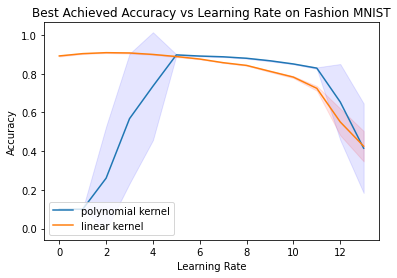

In [140]:
from matplotlib import pyplot as plt
import numpy as np
import math


def get_confidence_interval_and_mean(y):
    confidence_interval = 1.96 * np.std(y, axis=0)/math.sqrt(y.shape[0])
    mean = np.mean(y, axis=0)
    return confidence_interval, mean

polynomial_ci, polynomial_mean = get_confidence_interval_and_mean(polynomial_accuracies)

linear_ci, linear_mean = get_confidence_interval_and_mean(linear_accuracies)
x = np.array(list(range(polynomial_accuracies.shape[1])))
fig, ax = plt.subplots()
ax.plot(x,polynomial_mean)
ax.fill_between(x, (polynomial_mean-polynomial_ci), (polynomial_mean+polynomial_ci), color='b', alpha=.1)
ax.plot(x,linear_mean)
ax.fill_between(x, (linear_mean-linear_ci), (linear_mean+linear_ci), color='r', alpha=.1)

plt.title('Best Achieved Accuracy vs Learning Rate on Fashion MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend(['polynomial kernel', 'linear kernel'], loc='lower left')
plt.savefig(os.path.join(os.getcwd(), "fashion_mnist.jpg"),pil_kwargs={'quality':95}, dpi=300)
plt.show()


In [329]:
def get_columns_indices_with_no_zeros(arr):
    columns_to_include = []
    for column in range(arr.shape[1]):
        include_column = True
        for row in range(arr.shape[0]):
            if arr[row,column] == 0:
                include_column = False
        if include_column == True:
            columns_to_include.append(column)
    return columns_to_include

def get_max_upper_and_lower_bounds(ci, mean):
    upper_bounds = mean + ci
    max_upper_bound = max(upper_bounds)
    lower_bounds = mean - ci
    max_lower_bound = max(lower_bounds)
    return max_upper_bound, max_lower_bound

def get_min_upper_and_lower_bounds(ci, mean):
    upper_bounds = mean + ci
    min_upper_bound = min(upper_bounds)
    lower_bounds = mean - ci
    min_lower_bound = min(lower_bounds)
    return min_upper_bound, min_lower_bound

def generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, 
                    file_to_save, x_label, y_label, is_convergence=False, legend_loc='lower left'):
    list_of_raw_data = []
    for file_name in list_of_file_names:
        list_of_raw_data.append(get_np_array(path_to_files, file_name))
        
    learning_rates = get_np_array(path_to_files, learning_rates_file)
    learning_rates = learning_rates[0]
    
    list_of_formatted_data_to_plot = []
    for raw_data in list_of_raw_data:
        list_of_formatted_data_to_plot.append(get_confidence_interval_and_mean(raw_data))
        
    fig, ax = plt.subplots()
    ax.set_xscale('log',base=2)
    
    for i in range(len(list_of_formatted_data_to_plot)):
        x = learning_rates
        ci, mean = list_of_formatted_data_to_plot[i]
        print(list_of_file_names[i])
        print(mean)
        if is_convergence:
            columns_with_no_zeros = get_columns_indices_with_no_zeros(list_of_raw_data[i])
            x = x[columns_with_no_zeros]
            ci = ci[columns_with_no_zeros]
            mean = mean[columns_with_no_zeros]
            min_upper_bound, min_lower_bound = get_min_upper_and_lower_bounds(ci, mean)
            print("min_upper_bound: " + str(min_upper_bound))
            print("min_lower_bound: " + str(min_lower_bound))
        else:
            max_upper_bound, max_lower_bound = get_max_upper_and_lower_bounds(ci, mean)
            print("max_upper_bound: " + str(max_upper_bound))
            print("max_lower_bound: " + str(max_lower_bound))
        ax.plot(x,mean)
        ax.fill_between(x, (mean+ci), (mean-ci), alpha=.1)
    axes = plt.gca()
    if not is_convergence:
        axes.set_ylim([0.87,1.0])
        
    plt.title(fig_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.legend(fig_legend, loc=legend_loc)
    plt.savefig(os.path.join(os.getcwd(), file_to_save),pil_kwargs={'quality':95}, dpi=300)
    plt.show()
    

# MNIST results

polynomial_trainable/numpy_accuracies.npy
[0.11252857 0.11252857 0.11252857 0.11252857 0.49887142 0.98982856
 0.98887142 0.98832858 0.98618573 0.98448571]
max_upper_bound: 0.9905815425086013
max_lower_bound: 0.9890755829644211
linear/numpy_accuracies.npy
[0.79174285 0.98924286 0.99147142 0.99187143 0.99100001 0.99015714
 0.98871428 0.9858     0.98131429 0.97384286]
max_upper_bound: 1.0896004405731792
max_lower_bound: 0.9910970850749009
mixture_of_polynomial_and_RBF/numpy_accuracies.npy
[0.81464284 0.98941429 0.98958571 0.98761429 0.98671429 0.98624285
 0.98555714 0.98075715 0.98158571 0.97192856]
max_upper_bound: 1.1223717076235389
max_lower_bound: 0.9894025235939511


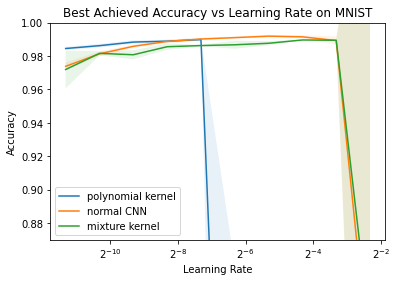

In [336]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_accuracies.npy','linear/numpy_accuracies.npy',
                     'mixture_of_polynomial_and_RBF/numpy_accuracies.npy']
learning_rates_file = 'linear/numpy_learning_rates.npy'
fig_title = 'Best Achieved Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "mnist_highest_accuracies.jpg"
x_label = 'Learning Rate'
y_label = 'Accuracy'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, legend_loc="lower left")

polynomial_trainable/numpy_target_convergence_97.npy
[ 0.          0.          0.          0.          4.27176105  5.22662111
  5.50096897  9.62649763 10.49703253 15.98749384]
min_upper_bound: 6.086789970724379
min_lower_bound: 4.366452244056388
linear/numpy_target_convergence_97.npy
[23.97192629  7.17955891  3.99593639  3.81189368  5.03256683  7.40683439
 11.59306301 19.37883246 33.59196807 61.38266066]
min_upper_bound: 4.335433080016894
min_lower_bound: 1.1168512472981869
mixture_of_polynomial_and_RBF/numpy_target_convergence_97.npy
[ 7.47696598  7.28541033  9.80631995 12.45134526 18.57079285 22.07341867
 23.02853458 42.1364216  42.44598367 44.34345855]
min_upper_bound: 8.019467450525427
min_lower_bound: 6.551353200417487


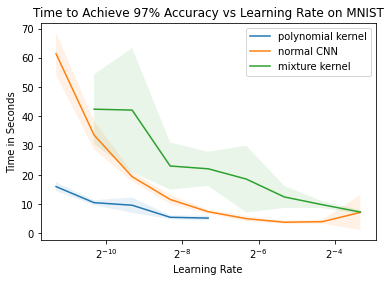

In [331]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_97.npy',
                      'linear/numpy_target_convergence_97.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_97.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 97% Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "mnist_time_to_97_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper right")

polynomial_trainable/numpy_target_convergence_98.npy
[ 0.          0.          0.          0.          5.39296901 11.0948232
 12.34778192 17.96558523 27.03224257 41.44519003]
min_upper_bound: 12.580011718806869
min_lower_bound: 9.609634687880227
linear/numpy_target_convergence_98.npy
[ 0.         20.17018749  6.20411998  7.62117118 10.96182644 15.06411641
 20.76878207 42.43610965 54.38201781  0.        ]
min_upper_bound: 6.663193450216914
min_lower_bound: -1.2818203260531682
mixture_of_polynomial_and_RBF/numpy_target_convergence_98.npy
[14.12198311 15.78746492 17.23852457 23.04642312 40.49901072 42.30791037
 49.5421619  67.17443753 80.51773762 28.00886473]
min_upper_bound: 17.951645070135296
min_lower_bound: 13.623284762844685


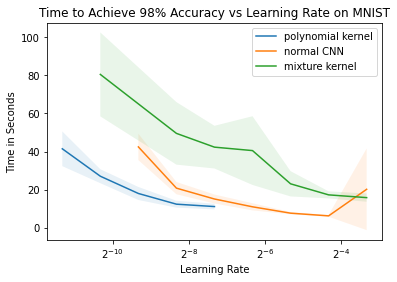

In [332]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_98.npy',
                      'linear/numpy_target_convergence_98.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_98.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 98% Accuracy vs Learning Rate on MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "mnist_time_to_98_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper right")

# Fashion MNIST results

polynomial_trainable/numpy_accuracies.npy
[0.1        0.1        0.10121429 0.1        0.58311428 0.9069
 0.90767142 0.90830001 0.90435715 0.9003857 ]
max_upper_bound: 0.928875368735628
max_lower_bound: 0.9072535398412948
linear/numpy_accuracies.npy
[0.88784286 0.90415713 0.91664286 0.92222857 0.92269999 0.91858572
 0.91251429 0.90174285 0.88857144 0.86862856]
max_upper_bound: 0.9249070417934697
max_lower_bound: 0.9209099997013026
mixture_of_polynomial_and_RBF/numpy_accuracies.npy
[0.7463     0.90710001 0.90655714 0.90864285 0.90252857 0.89915713
 0.89809999 0.89845715 0.89315715 0.88384286]
max_upper_bound: 1.0295602086968627
max_lower_bound: 0.9068821947950234


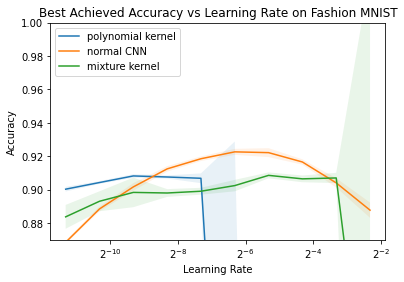

In [333]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_accuracies.npy','linear/numpy_accuracies.npy',
                     'mixture_of_polynomial_and_RBF/numpy_accuracies.npy']
learning_rates_file = 'linear/numpy_learning_rates.npy'
fig_title = 'Best Achieved Accuracy vs Learning Rate on Fashion MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "fashion_mnist_highest_accuracies.jpg"
x_label = 'Learning Rate'
y_label = 'Accuracy'
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, legend_loc="upper left")

polynomial_trainable/numpy_target_convergence_89.npy
[ 0.          0.          0.          0.         21.13841933 19.4864148
 25.99928959 29.72879382 35.95067392 58.36226845]
min_upper_bound: 21.683723581295123
min_lower_bound: 17.28910602148586
linear/numpy_target_convergence_89.npy
[50.18293054 27.5729951  12.18451652 12.52651236 15.86987345 22.78507103
 34.39050969 59.39098907 16.67778331  0.        ]
min_upper_bound: 13.841220975278073
min_lower_bound: 9.45915137467529
mixture_of_polynomial_and_RBF/numpy_target_convergence_89.npy
[50.34263912 44.45278315 30.19962259 46.76555904 65.62720694 75.60659714
 76.30155988 28.67331728 50.59647288 37.14565967]
min_upper_bound: 34.12722936198344
min_lower_bound: 26.272015820127024


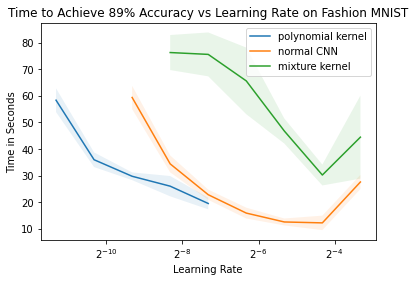

In [334]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_89.npy',
                      'linear/numpy_target_convergence_89.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_89.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 89% Accuracy vs Learning Rate on Fashion MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "fashion_mnist_time_to_89_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper right")

polynomial_trainable/numpy_target_convergence_90.npy
[ 0.          0.          0.          0.         37.38999907 42.00538944
 46.14838149 58.42591055 69.67206251 47.79923202]
min_upper_bound: 49.163774628115
min_lower_bound: 34.8470042587273
linear/numpy_target_convergence_90.npy
[ 0.         73.03823673 19.57999224 19.77969194 24.26782817 35.46768867
 49.64679899 48.76261925  0.          0.        ]
min_upper_bound: 20.06765535720567
min_lower_bound: 15.09354161432855
mixture_of_polynomial_and_RBF/numpy_target_convergence_90.npy
[70.01282174 76.70450664 59.70786663 74.22681408 74.5738329  16.00155757
 19.65437724 48.58038198 49.80726714  0.        ]
min_upper_bound: 70.65744133224455
min_lower_bound: 48.75829191860592


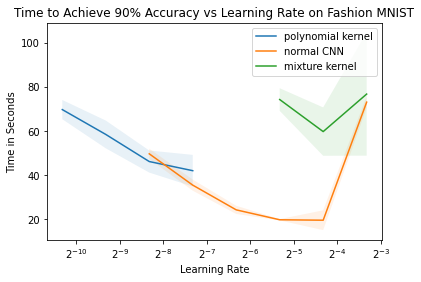

In [335]:
path_to_files = os.path.join(os.getcwd(),'final_results/20_epochs_fashion_mnist/')
list_of_file_names = ['polynomial_trainable/numpy_target_convergence_90.npy',
                      'linear/numpy_target_convergence_90.npy',
                      'mixture_of_polynomial_and_RBF/numpy_target_convergence_90.npy']
learning_rates_file = 'polynomial_trainable/numpy_learning_rates.npy'
fig_title = 'Time to Achieve 90% Accuracy vs Learning Rate on Fashion MNIST'
fig_legend = ['polynomial kernel', 'normal CNN', 'mixture kernel']
file_to_save = "fashion_mnist_time_to_90_accuracy.jpg"
x_label = 'Learning Rate'
y_label = 'Time in Seconds'
is_convergence = True
generate_figure(path_to_files, list_of_file_names, learning_rates_file, fig_title, fig_legend, file_to_save, 
                x_label, y_label, is_convergence, legend_loc="upper right")